## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

%load_ext autoreload
%autoreload 2

## Working with a ticker symbol data 

In [2]:
yf.Ticker??

Init signature: yf.Ticker(ticker, session=None, proxy=None)
Docstring:      <no docstring>
Source:        
class Ticker(TickerBase):
    def __init__(self, ticker, session=None, proxy=None):
        super(Ticker, self).__init__(ticker, session=session, proxy=proxy)
        self._expirations = {}
        self._underlying  = {}

    def __repr__(self):
        return f'yfinance.Ticker object <{self.ticker}>'

    def _download_options(self, date=None):
        if date is None:
            url = f"{_BASE_URL_}/v7/finance/options/{self.ticker}"
        else:
            url = f"{_BASE_URL_}/v7/finance/options/{self.ticker}?date={date}"

        r = self._data.get(url=url, proxy=self.proxy).json()
        if len(r.get('optionChain', {}).get('result', [])) > 0:
            for exp in r['optionChain']['result'][0]['expirationDates']:
                self._expirations[_datetime.datetime.utcfromtimestamp(
                    exp).strftime('%Y-%m-%d')] = exp

            self._underlying = r['op

In [3]:
# Find Ticker symbol list: https://www.eoddata.com/symbols.aspx
symbol = 'AAPL'
ticker = yf.Ticker(symbol)

In [4]:
ticker??

Type:        Ticker
String form: yfinance.Ticker object <AAPL>
File:        ~/Desktop/Projects/.venv/lib/python3.8/site-packages/yfinance/ticker.py
Source:     
class Ticker(TickerBase):
    def __init__(self, ticker, session=None, proxy=None):
        super(Ticker, self).__init__(ticker, session=session, proxy=proxy)
        self._expirations = {}
        self._underlying  = {}

    def __repr__(self):
        return f'yfinance.Ticker object <{self.ticker}>'

    def _download_options(self, date=None):
        if date is None:
            url = f"{_BASE_URL_}/v7/finance/options/{self.ticker}"
        else:
            url = f"{_BASE_URL_}/v7/finance/options/{self.ticker}?date={date}"

        r = self._data.get(url=url, proxy=self.proxy).json()
        if len(r.get('optionChain', {}).get('result', [])) > 0:
            for exp in r['optionChain']['result'][0]['expirationDates']:
                self._expirations[_datetime.datetime.utcfromtimestamp(
                    exp).strftime('%

In [5]:
type(ticker)

yfinance.ticker.Ticker

In [6]:
pd.Series(ticker.info).to_frame()

,0
address1,One Apple Park Way
city,Cupertino
state,CA
zip,95014
country,United States
...,...
grossMargins,0.45586
ebitdaMargins,0.33968
operatingMargins,0.30743
financialCurrency,USD


## Get Market data

In [7]:
data = ticker.history(period='5d',
                      interval='1m',
                      start=None,
                      end=None,
                      actions=True,
                      auto_adjust=True,
                      back_adjust=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1941 entries, 2024-05-13 09:30:00-04:00 to 2024-05-17 15:59:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1941 non-null   float64
 1   High          1941 non-null   float64
 2   Low           1941 non-null   float64
 3   Close         1941 non-null   float64
 4   Volume        1941 non-null   int64  
 5   Dividends     1941 non-null   float64
 6   Stock Splits  1941 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 121.3 KB


In [8]:
data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-05-13 09:30:00-04:00,185.434998,185.600006,184.910004,185.184998,2499804,0.0,0.0
2024-05-13 09:31:00-04:00,185.184998,185.589996,185.149994,185.509995,514765,0.0,0.0
2024-05-13 09:32:00-04:00,185.520004,185.580002,185.009995,185.019104,420314,0.0,0.0
2024-05-13 09:33:00-04:00,185.020004,185.029907,184.750000,184.800003,278222,0.0,0.0
2024-05-13 09:34:00-04:00,184.809998,184.970001,184.740005,184.949005,213600,0.0,0.0


In [9]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

<Axes: xlabel='Datetime'>

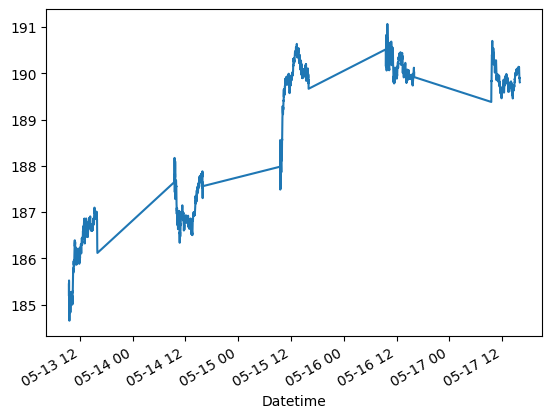

In [10]:
data.Open.sort_index().plot(kind="line")

In [11]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [12]:
# Plotting the OHLC data

fig = go.Figure(data=go.Ohlc(x=data.index,
                open=data.Open,
                high=data.High,
                low=data.Low,
                close=data.Close))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()


In [27]:
# For notebook rendering
mini_data = ticker.history(period='1d',
                      interval='1h',
                      start=None,
                      end=None,
                      actions=True,
                      auto_adjust=True,
                      back_adjust=False)
fig = go.Figure(data=go.Ohlc(x=mini_data.index,
                open=mini_data.Open,
                high=mini_data.High,
                low=mini_data.Low,
                close=mini_data.Close))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show("png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [13]:
ticker.actions

,Dividends,Stock Splits
Datetime,,


In [14]:
# Quarterly financials
ticker.quarterly_financials

,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.158,0.159,0.149715,0.125,0.149
Normalized EBITDA,30736000000.0,43221000000.0,30653000000.0,26783000000.0,31216000000.0
Net Income From Continuing Operation Net Minority Interest,23636000000.0,33916000000.0,22956000000.0,19881000000.0,24160000000.0
Reconciled Depreciation,2836000000.0,2848000000.0,2653000000.0,3052000000.0,2898000000.0
Reconciled Cost Of Revenue,48482000000.0,64720000000.0,49071000000.0,45384000000.0,52860000000.0
EBITDA,30736000000.0,43221000000.0,30653000000.0,26783000000.0,31216000000.0
EBIT,27900000000.0,40373000000.0,28000000000.0,23731000000.0,28318000000.0
Net Interest Income,NaN,NaN,-18000000.0,-18000000.0,-12000000.0
Interest Expense,NaN,NaN,1002000000.0,998000000.0,930000000.0


In [15]:
# Cashflow
ticker.quarterly_cashflow

,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31
Free Cash Flow,20694000000.0,37503000000.0,19435000000.0,24287000000.0,25644000000.0
Repurchase Of Capital Stock,-23205000000.0,-20139000000.0,-21003000000.0,-17478000000.0,-19594000000.0
Repayment Of Debt,-3148000000.0,-3984000000.0,0.0,460000000.0,-1996000000.0
Issuance Of Debt,NaN,NaN,0.0,NaN,NaN
Capital Expenditure,-1996000000.0,-2392000000.0,-2163000000.0,-2093000000.0,-2916000000.0
Interest Paid Supplemental Data,NaN,NaN,1213000000.0,717000000.0,1170000000.0
Income Tax Paid Supplemental Data,7276000000.0,7255000000.0,11659000000.0,2126000000.0,4066000000.0
End Cash Position,33921000000.0,41974000000.0,30737000000.0,29898000000.0,27129000000.0
Beginning Cash Position,41974000000.0,30737000000.0,29898000000.0,27129000000.0,21974000000.0
Changes In Cash,-8053000000.0,11237000000.0,839000000.0,2769000000.0,5155000000.0


In [16]:
# Analysist recommendations
ticker.recommendations_summary

,period,strongBuy,buy,hold,sell,strongSell
0,0m,11,21,6,0,0
1,-1m,9,17,14,2,0
2,-2m,10,17,12,2,0
3,-3m,10,24,7,1,0


In [17]:
ticker.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,11,21,6,0,0
1,-1m,9,17,14,2,0
2,-2m,10,17,12,2,0
3,-3m,10,24,7,1,0


In [18]:
ticker.options

('2024-05-24',
 '2024-05-31',
 '2024-06-07',
 '2024-06-14',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18')

In [19]:
ticker.option_chain??

Signature: ticker.option_chain(date=None, tz=None)
Docstring: <no docstring>
Source:   
    def option_chain(self, date=None, tz=None):
        if date is None:
            options = self._download_options()
        else:
            if not self._expirations:
                self._download_options()
            if date not in self._expirations:
                raise ValueError(
                    f"Expiration `{date}` cannot be found. "
                    f"Available expirations are: [{', '.join(self._expirations)}]")
            date = self._expirations[date]
            options = self._download_options(date)

        return _namedtuple('Options', ['calls', 'puts', 'underlying'])(**{
            "calls": self._options2df(options['calls'], tz=tz),
            "puts": self._options2df(options['puts'], tz=tz),
            "underlying": options['underlying']
        })
File:      ~/Desktop/Projects/.venv/lib/python3.8/site-packages/yfinance/ticker.py
Type:      method

In [20]:
# Puts
ticker.option_chain().puts.head(5)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240524P00100000,2024-05-08 14:07:31+00:00,100.0,0.01,0.0,0.01,0.0,0.0,2.0,20,1.437503,False,REGULAR,USD
1,AAPL240524P00105000,2024-04-25 16:50:24+00:00,105.0,0.02,0.0,0.01,0.0,0.0,NaN,1,1.343753,False,REGULAR,USD
2,AAPL240524P00110000,2024-05-17 13:30:01+00:00,110.0,0.01,0.0,0.01,0.0,0.0,10.0,11,1.250004,False,REGULAR,USD
3,AAPL240524P00115000,2024-05-10 19:39:02+00:00,115.0,0.01,0.0,0.01,0.0,0.0,10.0,230,1.156254,False,REGULAR,USD
4,AAPL240524P00120000,2024-05-13 18:09:15+00:00,120.0,0.01,0.0,0.01,0.0,0.0,50.0,897,1.062505,False,REGULAR,USD


In [21]:
# Calls
ticker.option_chain().calls.head(5)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240524C00100000,2024-05-10 14:32:09+00:00,100.0,83.6,89.60,90.30,0.0,0.0,7.0,7,1.878907,True,REGULAR,USD
1,AAPL240524C00105000,2024-05-14 19:54:01+00:00,105.0,82.3,84.60,85.35,0.0,0.0,1.0,1,1.804688,True,REGULAR,USD
2,AAPL240524C00115000,2024-04-29 17:14:13+00:00,115.0,59.9,74.65,75.35,0.0,0.0,NaN,0,1.593752,True,REGULAR,USD
3,AAPL240524C00120000,2024-04-12 14:24:01+00:00,120.0,57.8,62.85,63.85,0.0,0.0,1.0,1,0.000010,True,REGULAR,USD
4,AAPL240524C00125000,2024-05-13 14:37:51+00:00,125.0,61.2,64.60,65.35,0.0,0.0,1.0,3,1.316410,True,REGULAR,USD


## Inspecting multiple symbols

In [22]:
tickers = yf.Tickers('msft aapl goog amzn')

In [23]:
tickers.tickers

{'MSFT': yfinance.Ticker object <MSFT>,
 'AAPL': yfinance.Ticker object <AAPL>,
 'GOOG': yfinance.Ticker object <GOOG>,
 'AMZN': yfinance.Ticker object <AMZN>}

In [24]:
tickers.tickers["AMZN"].info

{'address1': '410 Terry Avenue North',
 'city': 'Seattle',
 'state': 'WA',
 'zip': '98109-5210',
 'country': 'United States',
 'phone': '206 266 1000',
 'website': 'https://www.aboutamazon.com',
 'industry': 'Internet Retail',
 'industryKey': 'internet-retail',
 'industryDisp': 'Internet Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': "Amazon.com, Inc. engages in the retail sale of consumer products, advertising, and subscriptions service through online and physical stores in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Echo, Ring, Blink, and eero; and develops and produces media content. In addition, the company offers programs that enable sellers to sell their products in its stores; and programs that allow auth

In [25]:
# Use history to get the historical prices for this share
tickers.tickers['AMZN'].history(period="1mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-18 00:00:00-04:00,181.470001,182.389999,178.649994,179.220001,30723800,0.0,0.0
2024-04-19 00:00:00-04:00,178.740005,179.000000,173.440002,174.630005,55950000,0.0,0.0
2024-04-22 00:00:00-04:00,176.940002,178.869995,174.559998,177.229996,37924900,0.0,0.0
2024-04-23 00:00:00-04:00,178.080002,179.929993,175.979996,179.539993,37046500,0.0,0.0
2024-04-24 00:00:00-04:00,179.940002,180.320007,176.179993,176.589996,34185100,0.0,0.0
2024-04-25 00:00:00-04:00,169.679993,173.919998,166.320007,173.669998,49249400,0.0,0.0
2024-04-26 00:00:00-04:00,177.800003,180.820007,176.130005,179.619995,43919800,0.0,0.0
2024-04-29 00:00:00-04:00,182.750000,183.529999,179.389999,180.960007,54063900,0.0,0.0
2024-04-30 00:00:00-04:00,181.089996,182.990005,174.800003,175.000000,94639800,0.0,0.0
